<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/01_curso_tensorflow_certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

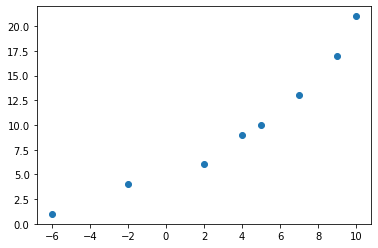

In [8]:
X = np.array([-2.0, 4.0, 9.0, 5.0, 10.0, 7.0, -6.0, 2.0])
y = np.array([4.0, 9.0, 17.0, 10.0, 21.0, 13.0, 1.0, 6.0])

plt.scatter(X,y)

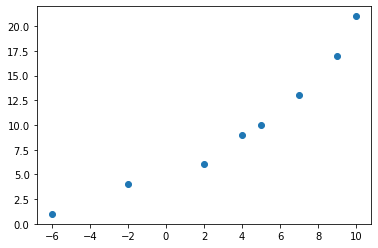

In [9]:
X = tf.constant([-2.0, 4.0, 9.0, 5.0, 10.0, 7.0, -6.0, 2.0])
y = tf.constant([4.0, 9.0, 17.0, 10.0, 21.0, 13.0, 1.0, 6.0])

plt.scatter(X,y)

In [11]:
X[2]

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

#Steps in modelling with tf
1.- Creating a simply model with Keras.

2.- Compiling a model. Define metrics, loss function and optimizer

3.- Fitting a model

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). 
#To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 825ms/step - loss: 8.0585 - mae: 8.0585
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 7.9171 - mae: 7.9171
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 7.7757 - mae: 7.7757
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 7.6343 - mae: 7.6343
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 7.4929 - mae: 7.4929


1/1 [==============================] - 0s 49ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

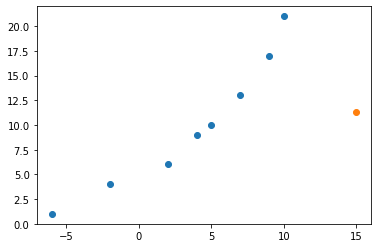

In [19]:
new_X = 15.0
new_y = model.predict([new_point])
plt.scatter(X,y)
plt.scatter(new_X, new_y)
plt

#Not very accurate

# How we could improve a model?
1.- Creating a model -> Add more layers, increase number of neurons in each layer, change the activation function.

2.- Compiling a model -> Changing the learning rate, change optimization function.

3.- Fitting a model -> Increase number of epochs, or on more data.

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 524ms/step - loss: 8.0585 - mae: 8.0585
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 7.9171 - mae: 7.9171
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 7.7757 - mae: 7.7757
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 7.6343 - mae: 7.6343
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4929 - mae: 7.4929
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3515 - mae: 7.3515
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.2101 - mae: 7.2101
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.0687 - mae: 7.0687
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.9273 - mae: 6.9273
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 6.7859 - mae: 6.7859
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

#Re-evaluation of new_X


1/1 [==============================] - 0s 61ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

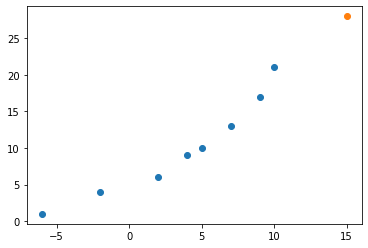

In [22]:
new_X = 15.0
new_y = model.predict([new_point])
plt.scatter(X,y)
plt.scatter(new_X, new_y)
plt

In [51]:
X1 = np.arange(-100,100,4)
y1 = X1 + 10

X_train = X1[:40]
y_train = y1[:40]
X_test = X1[40:]
y_test = y1[40:]

len(X_train), len(y_train)

(40, 40)

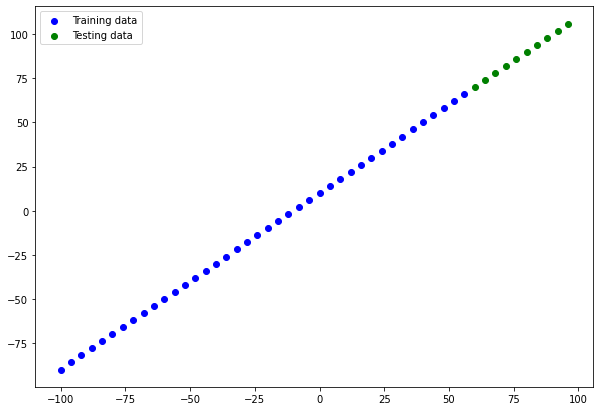

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


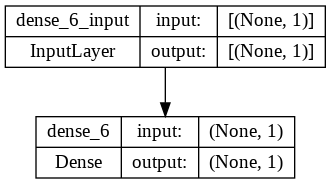

In [58]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

1/1 [==============================] - 0s 35ms/step


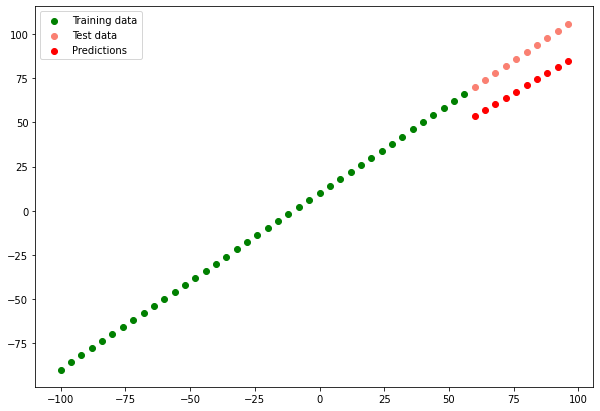

In [69]:
y_preds = model.predict(X_test)

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='g', label = 'Training data')
  plt.scatter(test_data, test_labels, c='salmon', label = 'Test data')
  plt.scatter(test_data, predictions, c='r', label = 'Predictions')
  plt.legend()

plot_predictions()